### Import libraries

### Workflow Documentation

Below is the process of training a Random Forest classifier on combined gene expression data and making predictions on unseen data. The workflow includes the following steps:

1. **Load Data**: Load the combined dataset and the unseen dataset from pickle files.
2. **Train Classifier**: Train a Random Forest classifier using the combined dataset.
3. **Make Predictions**: Use the trained classifier to make predictions on the unseen dataset.
4. **Evaluate Predictions**: Display and analyze the predictions made by the classifier.

The variables used in this notebook include:
- `combined_data`: DataFrame containing the combined gene expression data with the target variable `status`.
- `unseen_data`: DataFrame containing the unseen gene expression data.
- `X`: Features from the combined dataset.
- `y`: Target variable from the combined dataset.
- `X_unseen`: Features from the unseen dataset.
- `model`: Trained Random Forest classifier.
- `y_pred_unseen`: Predictions made by the classifier on the unseen dataset.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Loading the Combined DataFrame and the Unseen Data

In [11]:
combined_data = pd.read_pickle('combined_data.pkl')
unseen_data = pd.read_pickle("unseen_data.pkl")

### Random Forest Multi-classification

##### **Step 1: Train the classifier with the combined data**

In [6]:
# Split combined data into features and target
X = combined_data.drop(columns=['status'])  # Features
y = combined_data['status']  # Target variable

# Train the Random Forest model on the entire combined dataset
model = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)
model.fit(X, y)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

##### **Step 2: Split the unseen data into X (features) and y (target)**

In [20]:
X_unseen = unseen_data

##### **Step 3: Use the trained classifier to make predictions on the unseen data**

In [ ]:
y_pred_unseen = model.predict(X_unseen)

#display predictions


['normal' 'normal' 'normal' ... 'deleted' 'deleted' 'deleted']
Number of each prediction
normal       180606
amplified     60891
deleted       13572
Name: count, dtype: int64


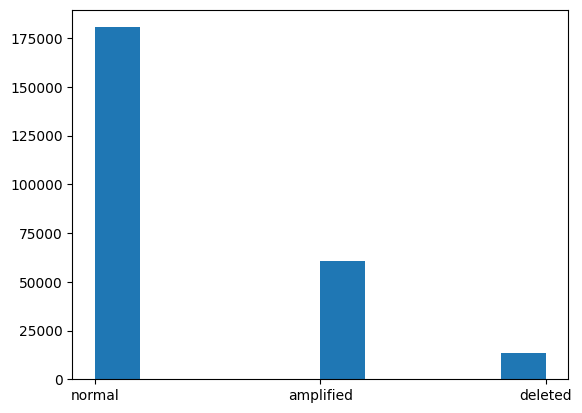

In [17]:
print(y_pred_unseen)

#print how many of each 
print("Number of each prediction")
print(pd.Series(y_pred_unseen).value_counts())


#plot predictions
plt.hist(y_pred_unseen)
plt.show()



ValueError: 'c' argument has 100 elements, which is inconsistent with 'x' and 'y' with size 255069.

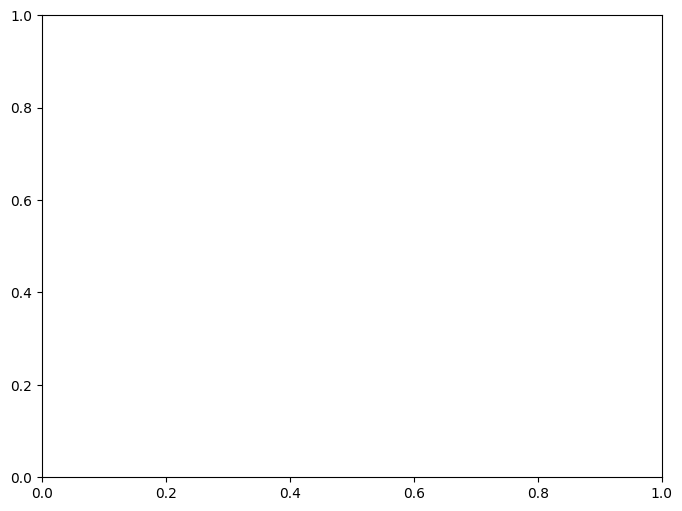

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unseen)  # Standardizing X_unseen

# Step 2: Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Plot the results, coloring points by predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_unseen, cmap='viridis', label='Predicted Labels')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA plot of Unseen Data with Predictions')
plt.colorbar(label='Predicted Class')
plt.show()
